# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import r2_score
from mlxtend.evaluate import bias_variance_decomp

import warnings
warnings.filterwarnings('ignore')

# How are the coefficients affected by Alpha(Lambda)?

## Load the dataset

In [2]:
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.shape

(442, 11)

## Train Test Split

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
X.shape, y.shape

((442, 10), (442,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

## Ridge Regression

In [9]:
coefs = list()
r2_scores = list()
alphas = [0, 10, 100, 1000]

for i in alphas:
    ridge = Ridge(alpha=i)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Prediction on test data
    y_pred = ridge.predict(X_test)

    # Append the values of coef_ and r2_score
    coefs.append(ridge.coef_.tolist())
    r2_scores.append(r2_score(y_test, y_pred))

## Plottings

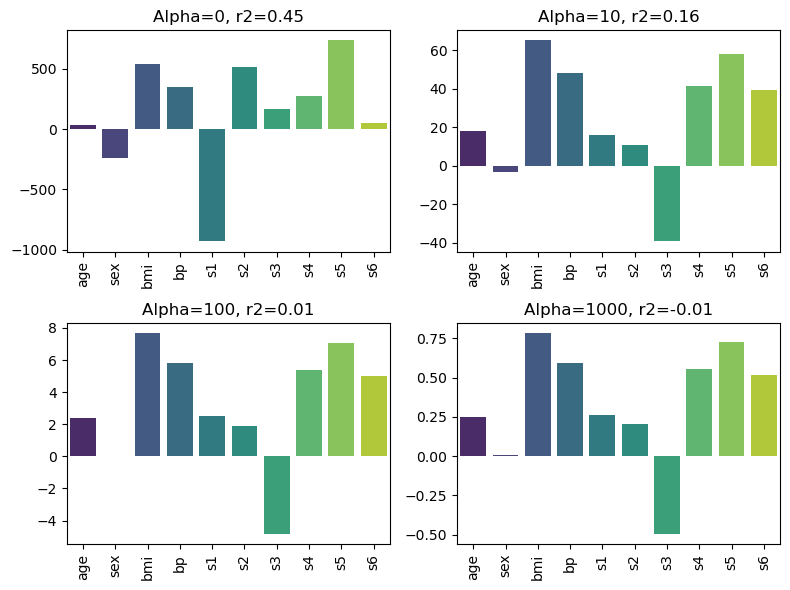

In [10]:
plt.figure(figsize=(8,6))

for i, alpha in enumerate(alphas):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=data.feature_names, y=coefs[i], palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'Alpha={alpha}, r2={r2_scores[i]:.2f}')
plt.tight_layout()
plt.show()

- In the first plot (top‑left), the Y‑axis ranges from about +750 to –1000 when Alpha = 0.
- In the second plot (top‑right), the Y‑axis narrows to about +60 to –40, showing that the coefficients have already shrunk noticeably as regularization is applied.
- In the third plot (bottom‑left), the Y‑axis further compresses to about +8 to –4, indicating an even stronger shrinkage of the coefficients.
- Finally, in the fourth plot (bottom‑right), the Y‑axis spans only +0.75 to –0.50, meaning the coefficients have been shrunk even more.

**Importantly, notice that the coefficients never become exactly zero—they just keep getting smaller as the regularization strength (alpha) increases.**

# Are the larger coefficients affected the most due to Regularization?

## Ridge Regression

In [11]:
coefs = list()
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for i in alphas:
    ridge = Ridge(alpha=i)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Append the values of coef_ and r2_score
    coefs.append(ridge.coef_.tolist())

## Coefficents Dataframe

In [12]:
coefs_df = pd.DataFrame(data=np.array(coefs), columns=data.feature_names)
coefs_df['alpha'] = alphas
coefs_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
0.0001,37.968967,-241.900460,542.593504,347.604088,-919.863924,508.995920,158.213776,273.689919,731.714305,48.786920
0.0010,38.483505,-241.351795,543.835179,346.782831,-827.701995,437.173749,116.949753,260.759264,696.129223,49.743447
0.0100,40.693422,-237.008020,546.161792,341.809317,-430.146300,129.902301,-60.460817,203.990842,541.098025,55.482553
0.1000,42.855670,-205.494319,505.089033,317.093205,-108.500262,-86.236733,-190.363180,151.707086,392.289319,79.908177
1.0000,45.367377,-76.666086,291.338832,198.995817,-0.530310,-28.577050,-144.511905,119.260066,230.221608,112.149830
10.0000,18.229623,-3.277536,65.128417,48.219668,16.238315,10.861055,-39.208913,41.438568,57.950124,39.359401
100.0000,2.414573,0.036315,7.689592,5.786517,2.488549,1.902019,-4.832511,5.397252,7.072654,5.030673
1000.0000,0.249289,0.008728,0.783880,0.590946,0.260657,0.201464,-0.495031,0.556314,0.723795,0.517311


- Larger coefficients experience stronger shrinkage as alpha increases. (see cost function for Ridge Regression). For example, observe the decrease in the values of columns - bmi, s2 with the increase in alpha.
- In other words, you can say, coefficient and alpha are inversely proportional.
- Caveat: All the coefficients shrink, but the relative effect is more pronounced for large ones because of the quadratic (square) penalty. 

## Plotting

In [13]:
coefs = list()
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]

for i in alphas:
    ridge = Ridge(alpha=i)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Append the values of coef_ and r2_score
    coefs.append(ridge.coef_.tolist())

In [14]:
input_array = np.array(coefs).T

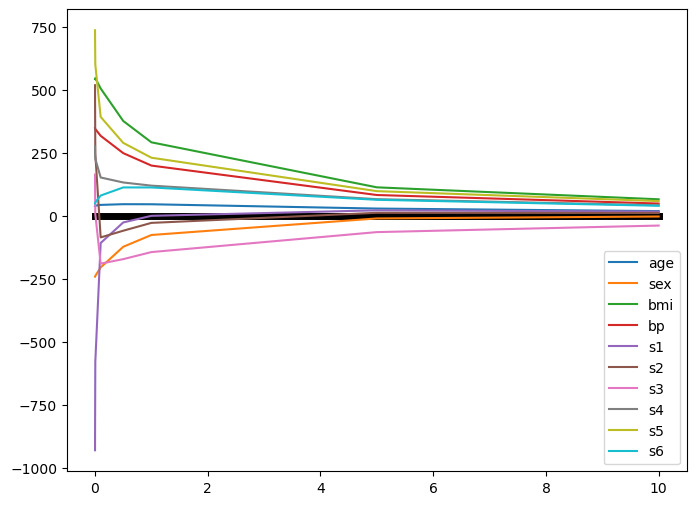

In [15]:
plt.figure(figsize=(8,6))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend()
plt.show()

- Thick Black color line is the ZERO Line of the coefficients.
- See how quickly the lines shrink towards ZERO line, but they never become ZERO.

# How does Ridge effect Bias and Variance?

## Create some non-linear data

In [16]:
X = 5 * np.random.rand(100, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(100, 1) 

## Scatter Plot of X vs y

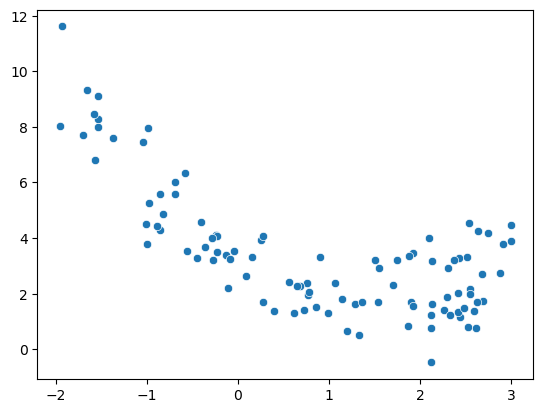

In [17]:
sns.scatterplot(x=X.ravel(), y=y.ravel());

## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

## Apply PolynomialFeatures transformation

In [20]:
poly = PolynomialFeatures(degree=5)

In [21]:
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

## Ridge Regression

In [22]:
alphas = np.linspace(start=0, stop=30, num=5)

loss = list()
bias = list()
variance = list()

for i in alphas:
    ridge = Ridge(alpha=i)

    # Fit the model using bias_variance_decomp
    avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(ridge, X_train, y_train, X_test, y_test, 
                                                                     loss='mse', random_seed=42)

    # Append these values to the lists
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(variance)

In [23]:
alphas

array([ 0. ,  7.5, 15. , 22.5, 30. ])

## Plotting of Bias-Variance Curve - killing the kernel

In [24]:
# plt.plot(alphas, loss, label='loss')
# plt.plot(alphas, bias, label='Bias')
# plt.plot(alphas, variance, label='Variance')
# plt.ylim(0,5)
# plt.xlabel('Alpha')
# plt.legend()
# plt.show()

In [25]:
# !nvidia-smi

# Effect of Ridge Regularization on Loss Function

## Generate some dataset

In [26]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

## Scatter Plot of X vs y

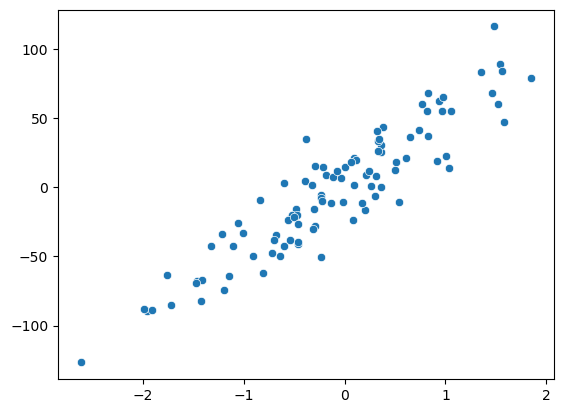

In [27]:
sns.scatterplot(x=X.ravel(), y=y.ravel());

## Linear Regression

In [28]:
lr = LinearRegression()

# Fit the model
lr.fit(X,y)

# Coefficient and Intercept
print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  [47.13323967]
Intercept:  2.3302306410539453


## Calculate Loss

In [29]:
def calculate_loss(coef, alpha):
    # L = np.sum(Yi - m * Xi)^2 + lambda * m^2
    return np.sum((y - coef * X.ravel() + 2.33) ** 2) + alpha * coef * coef

In [30]:
def predict(coef):
    return coef * X - 2.33

## Plotting

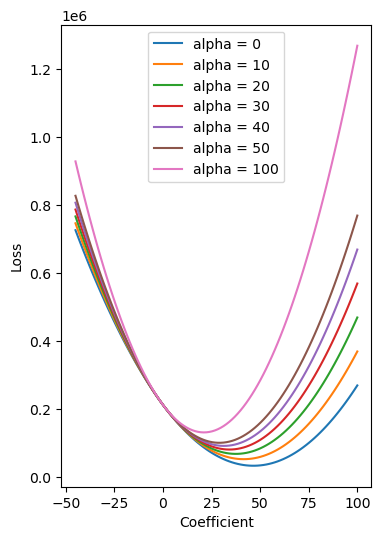

In [31]:
coef = np.linspace(start=-45, stop=100, num=100)
alphas = [0, 10, 20, 30, 40, 50, 100]

plt.figure(figsize=(4,6))

for j in alphas:
    loss = []
    for i in range(coef.shape[0]):
        loss_i = calculate_loss(coef[i], j)
        loss.append(loss_i)
    plt.plot(coef, loss, label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Coefficient')
plt.ylabel('Loss')
plt.show()

- As the alpha increases, the loss function curve moves towards origin, which implies, the coefficients shrink.